<a href="https://colab.research.google.com/github/joao-albc/votos-publicos/blob/main/LDO_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<h1>Objetivo</h1>**

No dia 16/07/2021 uma matéria ganhou notoriedade ao informar que os deputados no país votaram, em sua maioria, a favor do aumento das diretrizes orçamentárias para o ano de 2022. Quando abri a matéria do **UOL** dentro da parte de enonomia, senti falta de comunicar visualmente a distribuição dos votos. Para treino de expressões regulares e visualização de dados, montei este notebook e o dashboard.

#**<h1>Visualização</h1>**

Adianto aqui a visualização interativa através do **Google Data Studio**. A escolha desta ferramenta venho por eu acreditar que ela é uma das mais democrática para aqueles que não tem grande próximidade com dashboards e tecnologia.

**Link:**

> *https://datastudio.google.com/reporting/c39673c4-d2dc-4b3d-9160-067565600f8e*

*Abaixo, um print do resultado final.*


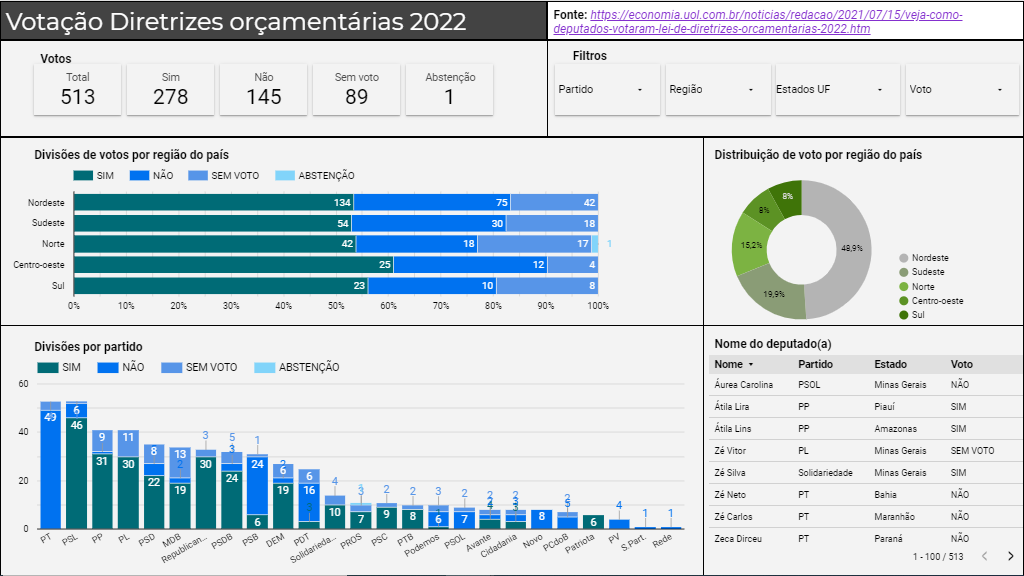

#Processo

**<h1>Importando bibliotecas</h1>**

In [ ]:
import bs4
import urllib.request as urllib_request
import pandas as pd
import re
import numpy as np

**<h1>Extração dos dados</h1>**

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = 'https://economia.uol.com.br/noticias/redacao/2021/07/15/veja-como-deputados-votaram-lei-de-diretrizes-orcamentarias-2022.htm'

response = urlopen(url)
html = response.read()

soup = BeautifulSoup(html, 'html.parser')

**<h2>Sessão de dentro do HTML</h2>**

In [ ]:
#VOTOS
votos = soup.find('div', {'class':'text '},'ul').find_all('li')

**<h2>Separando e organizando os dados para um Data Frame</h2>**

In [ ]:
nome = []
partido = []
estado = []
voto = []
c = 0
for i in votos:
  #Elementos de voto
  n = re.search('(#?li>)(.*)\((.*)-(.+)\).*-(.*)</li',str(votos[c]))
  nome.append(n.group(2))
  partido.append(n.group(3))
  estado.append(n.group(4))
  voto.append(n.group(5))
  c+=1

In [ ]:
#Estados_nome

estados_nome = []
for i in soup.find('div', {'class':'text '},'ul').find_all('p')[8:]:
  estados_nome.append(re.search('<strong>(.*)</strong>',str(i)).group(1))

In [ ]:
#Estados_sigla
estado_sigla = []
for i in pd.unique(estado):
  estado_sigla.append(i)
estado_sigla

In [ ]:
#Regiões

nome_da_regiao =[]
c = 0
for i in estado:
  nome_do_estado.append(unidades[estado[c]])
  c+=1
nome_do_estado

In [ ]:
estados_nome

['Acre',
 'Alagoas',
 'Amapá',
 'Amazonas',
 'Bahia',
 'Ceará',
 'Distrito Federal',
 'Espirito Santo',
 'Goiás',
 'Maranhão',
 'Mato Grosso',
 'Mato Grosso do Sul',
 'Minas Gerais',
 'Pará',
 'Paraíba',
 'Paraná',
 'Pernambuco',
 'Piauí',
 'Rio de Janeiro',
 'Rio Grande do Norte',
 'Rio Grande do Sul',
 'Rondônia',
 'Roraima',
 'Santa Catarina',
 'São Paulo',
 'Sergipe',
 'Tocantins']

In [ ]:
#Criando o dicionário Unidades da Federação

unidades = {}
c = 0
for i in estado_sigla:
  # unidades.add(estado_sigla[c]:estados_nome[c])
  unidades[estado_sigla[c]] = estados_nome[c]
  c+=1
unidades

In [ ]:
np.unique(nome_do_estado)

array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espirito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná',
       'Paraíba', 'Pará', 'Pernambuco', 'Piauí', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rio de Janeiro', 'Rondônia', 'Roraima',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins'],
      dtype='<U19')

In [ ]:
#Regiões pegas manualmente 

regiao = ['Norte','Nordeste','Norte','Norte','Nordeste', 'Nordeste',
       'Centro-oeste', 'Sudeste', 'Centro-oeste', 'Nordeste',
       'Centro-oeste', 'Centro-oeste', 'Sudeste', 'Sul',
       'Nordeste', 'Norte', 'Nordeste', 'Nordeste', 'Nordeste',
       'Sul', 'Sudeste', 'Norte', 'Norte',
       'Sul', 'Nordeste', 'Sudeste', 'Norte'] 

In [ ]:
#Criando o dicionário das regiões do país

regioes = {}
c = 0
for i in estados_nome:
  regioes[estados_nome[c]] = regiao[c]
  c+=1
regioes

In [ ]:
nome_regiao_do_pais = []
c = 0
for i in estado:
  nome_regiao_do_pais.append(regioes[nome_do_estado[c]])
  c+=1
nome_regiao_do_pais

**<h2>Criação do Data Frame</h2>**

In [ ]:
votacao_LDO_2022 = {'Nome':nome,'Partido':partido,'Sigla Estado UF':estado,'Nome Estado UF':nome_do_estado,'Nome Região País':nome_regiao_do_pais,'Voto':voto}

votacao_LDO_2022 = pd.DataFrame(votacao_LDO_2022)

In [ ]:
votacao_LDO_2022

,Nome,Partido,Sigla Estado UF,Nome Estado UF,Nome Região País,Voto
0,Alan Rick,DEM,AC,Acre,Norte,SIM
1,Dra. Vanda Milani,Solidariedade,AC,Acre,Norte,SEM VOTO
2,Flaviano Melo,MDB,AC,Acre,Norte,SIM
3,Jéssica Sales,MDB,AC,Acre,Norte,SEM VOTO
4,Jesus Sérgio,PDT,AC,Acre,Norte,SEM VOTO
...,...,...,...,...,...,...
508,Eli Borges,Solidariedade,TO,Tocantins,Norte,SEM VOTO
509,Osires Damaso,PSC,TO,Tocantins,Norte,SIM
510,Profª Dorinha,DEM,TO,Tocantins,Norte,SIM
511,Tiago Dimas,Solidariedade,TO,Tocantins,Norte,SIM


In [ ]:
votacao_LDO_2022.to_csv('votacao_LDO_2022.csv',header=True, index_label=True)